In [130]:
#install.packages("dlookr")
install.packages("imputation")

Warning message:
"package 'imputation' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [124]:
library(lubridate)
library(dlookr)
library(dplyr)
library(analytics)

ERROR: Error in library(analytics): there is no package called 'analytics'


In [81]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/1_percent_data_h.csv.gz",temp2)
data <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "2.40999999999985S"


In [114]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/1_percent_data.csv.gz",temp2)
data2 <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "4.61000000000013S"


In [82]:
data$service[data$service==""] <- NA
head(data)

,ts,uid,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1331901000,CCUIP21wTjqkj8ZqX5,192.168.202.79,50463,192.168.229.251,80,tcp,NA,NA,NA,NA,SH,0,Fa,1,52,1,52
2,1331901000,Csssjd3tX0yOTPDpng,192.168.202.79,46117,192.168.229.254,443,tcp,NA,NA,NA,NA,SF,0,dDafFr,3,382,9,994
3,1331901000,CHEt7z3AzG4gyCNgci,192.168.202.79,50465,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
4,1331901000,CKnDAp2ohlvN6rpiXl,192.168.202.79,50467,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
5,1331901000,CGUBcoXKxBE8gTNl,192.168.202.79,46119,192.168.229.254,443,tcp,ssl,0.02,544,1060,SF,0,ShADadfFr,8,968,13,1744
6,1331901000,CRksHc2i8qahpGOP19,192.168.202.79,46121,192.168.229.254,443,tcp,ssl,0.01,544,1060,SF,0,ShADadfFr,8,968,13,1744


In [83]:
for(i in c(4,6)) data[,i]=as.numeric(data[,i])

In [84]:
diagnose(data)
print("No. of entries in data:")
nrow(data)
class(data)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
ts,numeric,0,0.00000,8231,3.626902e-02
uid,character,0,0.00000,226943,1.000000e+00
orig_ip,character,0,0.00000,72,3.172603e-04
orig_port,numeric,0,0.00000,5289,2.330541e-02
resp_ip,character,0,0.00000,517,2.278105e-03
resp_port,numeric,0,0.00000,28117,1.238945e-01
proto,character,0,0.00000,3,1.321918e-05
service,character,225579,99.39897,6,2.643836e-05
duration,numeric,82146,36.19675,1040,4.582649e-03


[1] "No. of entries in data:"


[1] 226943

[1] "data.frame"

We see that every entry in uid is unique, therefore there are no trends that we'll be able to observe and so we can cut the column.

In [85]:
if("uid" %in% colnames(data))
{
    data <- subset(data, select = -c(uid));
}
head(data)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1331901000,192.168.202.79,50463,192.168.229.251,80,tcp,NA,NA,NA,NA,SH,0,Fa,1,52,1,52
2,1331901000,192.168.202.79,46117,192.168.229.254,443,tcp,NA,NA,NA,NA,SF,0,dDafFr,3,382,9,994
3,1331901000,192.168.202.79,50465,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
4,1331901000,192.168.202.79,50467,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
5,1331901000,192.168.202.79,46119,192.168.229.254,443,tcp,ssl,0.02,544,1060,SF,0,ShADadfFr,8,968,13,1744
6,1331901000,192.168.202.79,46121,192.168.229.254,443,tcp,ssl,0.01,544,1060,SF,0,ShADadfFr,8,968,13,1744


In [129]:
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
ts,0
orig_ip,0
orig_port,0
resp_ip,0
resp_port,0
proto,0
service,225579
duration,82146
orig_bytes,82146


In [122]:
nrow(data[!complete.cases(data),])
cut_data <- na.omit(data)
nrow(cut_data)

[1] 226181

[1] 762

Cutting out missing data seems unacceptable in this case as we would be left with only 762 of our original 226943 rows. That's only 0.336% of our original data!

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"84 y values <= 0 omitted from logarithmic plot"


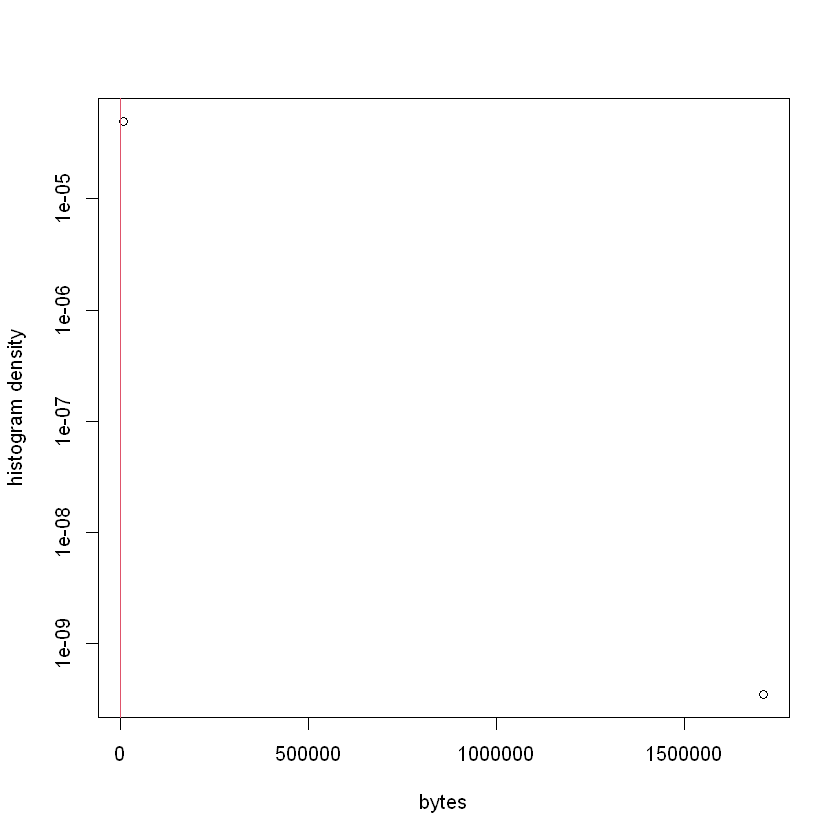

In [111]:
nbreaks=100 ## Choose this
thist=hist(data[,"resp_bytes"],breaks=nbreaks,plot=FALSE)
plot(thist$mids,thist$density,log="y",type="b",
     xlab="bytes",ylab="histogram density")
threshold=1200 # obvious threshold
abline(v=threshold,col=2)

In [110]:
resp_port_count <- as.data.frame(table(data$resp_port))
resp_port_count <- resp_port_count[order(-resp_port_count$Freq),]
rownames(resp_port_count) <- 1:nrow(resp_port_count)
colnames(resp_port_count) <- c("Port Number", "Frequency")
head(resp_port_count,10)

,Port Number,Frequency
,<fct>,<int>
1,49160,2196
2,445,1550
3,443,1246
4,53,668
5,80,668
6,137,155
7,139,70
8,67,59
9,9001,57


In [109]:
orig_port_count <- as.data.frame(table(data$orig_port))
orig_port_count <- orig_port_count[order(-orig_port_count$Freq),]
rownames(resp_port_count) <- 1:nrow(resp_port_count)
colnames(resp_port_count) <- c("Port Number", "Frequency")
head(orig_port_count,10)

,Var1,Freq
,<fct>,<int>
5230,63805,192329
5231,63806,27261
1391,45658,260
261,21371,119
9,137,112
1392,45659,106
3,68,59
6,134,50
10,138,40


Warning message in breaks[-1L] + breaks[-nB]:
"NAs produced by integer overflow"


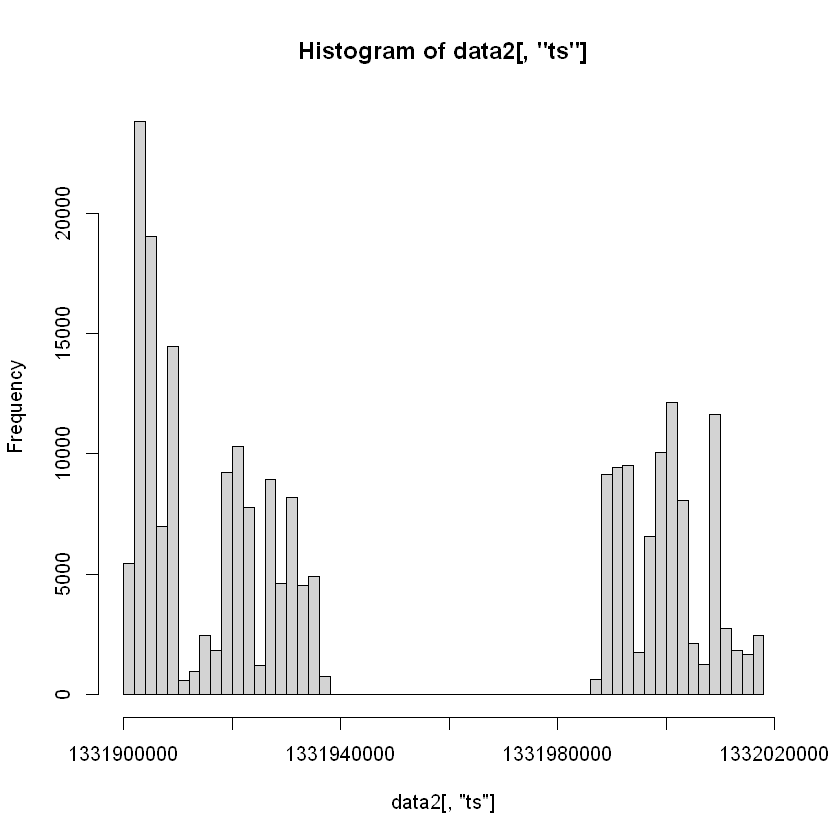

In [118]:
hist(data2[,"ts"],breaks=50)

[Missing Data in R](https://www.statmethods.net/input/missingdata.html)